### Задание 1
Решите линейную систему:<br><br>
$\left[\begin{array}{ccc}{1} & {2} & {3} \\ {4} & {0} & {6} \\ {7} & {8} & {9}\end{array}\right] \cdot X=$ $\left[\begin{array}{c}{12} \\ {2} \\ {1}\end{array}\right]$

#### Решение:

In [1]:
import numpy as np

In [2]:
A = np.array([[1, 2, 3],
              [4, 0, 6],
              [7, 8, 9]], float)
B = np.array([12, 2, 1], float)
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

#### Ответ:
$X = (-9.2, 0.9, 6,4(6))$

### Задание 2
Найдите псевдорешение:$$\begin{array}{l}{x+2 y-z=1} \\ {3 x-4 y=7} \\ {8 x-5 y+2 z=12} \\ {2 x-5 z=7} \\ {11 x+4 y-7 z=15}\end{array}$$

#### Решение:

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
A = np.array([[1, 2, -1],
              [3, -4, 0],
              [8, -5, 2],
              [2, 0, -5],
              [11, 4, -7]], float)
B = np.array([1, 7, 12, 7, 15], float)

In [5]:
np.linalg.matrix_rank(A, 0.0001)

3

Система несовместна. Можно найти только псевдорешение

In [6]:
X = np.linalg.lstsq(A, B)[0]
X

array([ 1.13919353, -0.90498444, -0.9009803 ])

In [7]:
sigma = np.dot(A, X) - B
sigma

array([-0.76979505,  0.03751834, -0.16349019, -0.21671145,  0.21805313])

In [8]:
np.linalg.norm(sigma)

0.8457139653464233

#### Ответ:
$X = (1.13919353, -0.90498444, -0.9009803)$

### Задание 3
Сколько решений имеет линейная система:<br> 
<br>$\left[\begin{array}{ccc}{1} & {2} & {3} \\ {4} & {5} & {6} \\ {7} & {8} & {9}\end{array}\right] \cdot X=$ $\left[\begin{array}{c}{12} \\ {2} \\ {1}\end{array}\right]$

Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее.

#### Решение:

In [9]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]], float)
B = np.array([12, 2, 1], float)
C = np.array([[1, 2, 3, 12],
              [4, 5, 6, 2],
              [7, 8, 9, 1]], float)
print(np.linalg.matrix_rank(A, 0.0001))
print(np.linalg.matrix_rank(C, 0.0001))
np.linalg.solve(A, B)

2
3


array([ 2.83726777e+16, -5.67453553e+16,  2.83726777e+16])

Ранги разные. Система несовместна. Попытка решения возвращает огромные значения.<br>Предположим, что решение $(1, 1, 1)$

In [10]:
B = np.array([6, 15, 24], float)
np.linalg.solve(A, B)

array([-0.6,  4.2, -0.6])

$\left[\begin{array}{ccc}{1} & {2} & {3} \\ {4} & {5} & {6} \\ {7} & {8} & {9}\end{array}\right] \cdot X=$ $\left[\begin{array}{c}{6} \\ {15} \\ {24}\end{array}\right]$

Решив на листочке, получим $y=3-2x; z = x$

#### Ответ:
Изначальная система не имеет решений. Изменив вектор правой части на $(6, 5, 24)$ получим в качестве решений множество векторов $(x, 3-2x, x)$

### Задание 4
Вычислите LU-разложение матрицы:
$$\left[\begin{array}{ccc}{1} & {2} & {3} \\ {2} & {16} & {21} \\ {4} & {28} & {73}\end{array}\right]$$

После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

#### Решение

In [11]:
A = np.array([[1, 2,  3],
              [2, 16, 21],
              [4, 28, 73]], float)
np.linalg.det(A)

432.00000000000017

In [12]:
import scipy.linalg as sp 
P, L, U = sp.lu(A)
print(P, L, U, sep='\n\n')

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]

[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]

[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


In [13]:
print(np.dot(P.transpose(), A))
print(np.dot(L, U))

[[ 4. 28. 73.]
 [ 1.  2.  3.]
 [ 2. 16. 21.]]
[[ 4. 28. 73.]
 [ 1.  2.  3.]
 [ 2. 16. 21.]]


Разложение верно

In [14]:
В = np.array([4, -7, 1])
X = np.linalg.solve(A, B)
print(X)
print(np.linalg.norm(np.dot(A, X) - B))

[ 5.56944444  0.42361111 -0.13888889]
1.9860273225978185e-15


### Задание 5
Найдите нормальное псевдорешение недоопределенной системы:

$$\begin{array}{l}{x + 2y – z = 1}\\{8x – 5y + 2z = 12}\end{array}$$

Для этого определите функцию $Q(x,y,z)$, равную норме решения, и найдите ее минимум.

#### Решение:

$$\begin{array}{l}{y = 10x - 14}\\{z = x + 2y - 1}\end{array}$$

#### 1 способ:

In [26]:
A = np.array([[1, 2, -1],
              [8, -5, 2]], float)
B = np.array([1, 12])
np.linalg.lstsq(A, B)[0]

array([ 1.38191882, -0.18081181,  0.0202952 ])

#### 2 способ:

In [27]:
def Q(x, y, z):
    return (x ** 2 + y ** 2 + z ** 2)

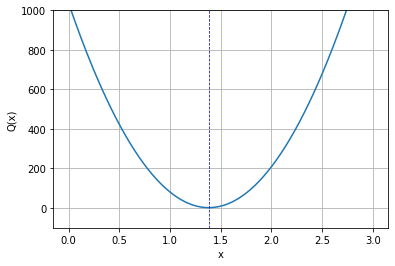

In [28]:
import matplotlib.pyplot as plt
x = np.linspace(0, 3, 201)
plt.plot(x, Q(x, 10 * x - 14, 21 * x - 29))
plt.xlabel('x')
plt.ylabel('Q(x)')
plt.grid()
plt.ylim(-100, 1000)
plt.plot([1.382, 1.382], [-100, 1000], color='blue', linewidth=0.75, linestyle='--');

#### Ответ:
Нормальное псевдорешение $(1.38191882, -0.18081181,  0.0202952)$

### Задание 6
Найдите одно из псевдорешений вырожденной системы:<br><br>
$\left[\begin{array}{ccc}{1} & {2} & {3} \\ {4} & {5} & {6} \\ {7} & {8} & {9}\end{array}\right] \cdot X=$ $\left[\begin{array}{c}{2} \\ {5} \\ {11}\end{array}\right]$

#### Решение:

In [18]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]], float)
B = np.array([2, 5, 11], float)
C = np.array([[1, 2, 3, 2],
              [4, 5, 6, 5],
              [7, 8, 9, 11]], float)
print(np.linalg.matrix_rank(A, 0.0001))
print(np.linalg.matrix_rank(C, 0.0001))

2
3


Система несовместнаая. Точных решений нет.

Найдем сначала одно из решение через $QR$-разложение

In [19]:
Q, R = np.linalg.qr(A)
print(Q, R, np.dot(Q, R), sep='\n\n')

[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]

[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11164740e-15]]

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [20]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [21]:
B1 = np.dot(np.transpose(Q), B)[:2]
B1

array([-1.21860576e+01,  8.54871729e-15])

In [22]:
X1 = np.linalg.solve(R1, B1)
print(X1)
X = np.append(X1, 0)
print(X)
np.linalg.norm(X), np.linalg.norm(np.dot(A, X) - B)

[1.50000000e+00 9.45096256e-15]
[1.50000000e+00 9.45096256e-15 0.00000000e+00]


(1.4999999999999893, 1.2247448713915885)

А теперь найдем нормальное всевдорешение готовым методом:

In [23]:
X = np.linalg.lstsq(A, B)[0]
X

array([ 1.25,  0.5 , -0.25])

In [24]:
np.linalg.norm(X), np.linalg.norm(np.dot(A, X) - B)

(1.3693063937629126, 1.224744871391589)

#### Ответ:
Нормальное псевдорешение решение $(1.25,  0.5 , -0.25)$